### Analysis of Tech Employee Dataset for Workforce Insights

#### 1. Dataset Overview
This dataset, comprising 1,470 records and 35 columns, captures various characteristics and metrics related to employees in a technology-focused organization. The data includes demographics, job roles, satisfaction levels, compensation, and attrition status. This dataset offers a broad view of the workforce, which can provide insights into employee satisfaction, retention, and overall productivity.

#### 2.Objective of the Analysis

The primary objective of this analysis is to understand patterns in employee attrition, satisfaction, and productivity. By analyzing this data, we aim to:

- Identify factors that may influence employee retention.
- Understand employee demographics, job roles, and satisfaction levels.
- Explore relationships between compensation, work-life balance, and attrition.




In [37]:
%pip install pandas
%pip install scipy==1.5.4
%pip install shap==0.46.0
%pip install --upgrade pip setuptools wheel
%pip install matplotlib
%pip install seaborn
%pip install scipy




Note: you may need to restart the kernel to use updated packages.
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [82 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
        Using cached wheel-0.45.0-py3-none-any.whl.metadata (2.3 kB)
        Using cached setuptools-75.5.0-py3-none-any.whl.metadata (6.8 kB)
        Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl.metadata (3.2 kB)
        Using cached numpy-1.17.3.zip (6.4 MB)
 


  Using cached shap-0.46.0.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached tqdm-4.67.0-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.60.0.tar.gz (2.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
          exec(compile('''
          ~~~~^^^^^^^^^^^^
          # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
          ...<31 lines>...
          exec(compile(setup_py_code, filename, "exec"))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
          ''' % ('C:\\Users\\65811\\AppData\\Local\\Temp\\pip-install-a0f8p2f7\\numba_dc343d29cb0b4536a0babdec6b5fe1ef\\setup.py',), "<pip-setuptools-caller>", "exec"))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "<pip-setuptools-caller>", line 34, in <module>
        

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 3.Data Collection and Source

This dataset was obtained from internal HR records. Each entry corresponds to a unique employee, capturing data such as "Age," "Department," "Job Role," and "Monthly Income." No personally identifiable information (PII) is included, ensuring privacy and data security.

In [38]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

tech_employee = pd.read_csv(r'C:\dataset1\Tech_Employee_Data.csv')

# Display the first few rows of the dataset
tech_employee.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [39]:
tech_employee.shape

(1470, 35)

In [40]:
tech_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
tech_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### 4.Data Preprocessing

To prepare the data for analysis, we performed the following preprocessing steps:

- **Null Value Check**: We verified that the dataset has no missing values, ensuring completeness.
- **Column Renaming**: We modified column names to improve readability. For instance, "BusinessTravel" was changed to "Business Travel," and "MonthlyRate" was changed to "Monthly Rate."
- **Data Type Validation**: Each column was verified for appropriate data types, such as integers for numerical values (e.g., "Age") and strings for categorical fields (e.g., "Attrition").


In [42]:
# Check for null values in the dataset
null_values = tech_employee.isnull().sum()

# Display columns with null values
null_columns = null_values[null_values > 0]
print("Columns with null values and their counts:")
print(null_columns)


Columns with null values and their counts:
Series([], dtype: int64)


The output Series([], dtype: int64) indicates that there are no columns with null values in your dataset. In other words, every column in your tech_employee DataFrame is fully populated, with no missing or null entries.

In [43]:
# Define a dictionary to map old column names to new column names
column_rename_mapping = {
    'BusinessTravel': 'Business Travel', 
    'DailyRate': 'Daily Rate',  
    'DistanceFromHome': 'Distance From Home', 
    'EducationField': 'Education Field', 
    'EmployeeCount': 'Employee Count', 
    'EmployeeNumber': 'Employee Number', 
    'EnvironmentSatisfaction': 'Environment Satisfaction', 
    'HourlyRate': 'Hourly Rate', 
    'JobInvolvement': 'Job Involvement', 
    'JobLevel': 'Job Level', 
    'JobRole': 'Job Role', 
    'JobSatisfaction': 'Job Satisfaction', 
    'MaritalStatus': 'Marital Status', 
    'MonthlyIncome': 'Monthly Income', 
    'MonthlyRate': 'Monthly Rate', 
    'NumCompaniesWorked': 'Num Companies Worked', 
    'Over18': 'Over 18', 
    'OverTime': 'Over Time', 
    'PercentSalaryHike': 'Percent Salary Hike', 
    'PerformanceRating': 'Performance Rating', 
    'RelationshipSatisfaction': 'Relationship Satisfaction', 
    'StandardHours': 'Standard Hours', 
    'StockOptionLevel': 'Stock Options Level', 
    'TotalWorkingYears': 'Total Working Years', 
    'TrainingTimesLastYear': 'Training Times Last Year', 
    'WorkLifeBalance': 'Work-Life Balance', 
    'YearsAtCompany': 'Years At Company', 
    'YearsInCurrentRole': 'Years In Current Role', 
    'YearsSinceLastPromotion': 'Years Since Last Promotion', 
    'YearsWithCurrManager': 'Years With Current Manager'
}

# Rename columns
tech_employee.rename(columns=column_rename_mapping, inplace=True)

# Display the updated column names to confirm the change
print(tech_employee.columns)


Index(['Age', 'Attrition', 'Business Travel', 'Daily Rate', 'Department',
       'Distance From Home', 'Education', 'Education Field', 'Employee Count',
       'Employee Number', 'Environment Satisfaction', 'Gender', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
       'Marital Status', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Over 18', 'Over Time', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Standard Hours',
       'Stock Options Level', 'Total Working Years',
       'Training Times Last Year', 'Work-Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Current Manager'],
      dtype='object')


In [44]:
tech_employee.head(10)

,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Count,Employee Number,...,Relationship Satisfaction,Standard Hours,Stock Options Level,Total Working Years,Training Times Last Year,Work-Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [45]:
tech_employee.tail(10)

,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Count,Employee Number,...,Relationship Satisfaction,Standard Hours,Stock Options Level,Total Working Years,Training Times Last Year,Work-Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [46]:
tech_employee.columns

Index(['Age', 'Attrition', 'Business Travel', 'Daily Rate', 'Department',
       'Distance From Home', 'Education', 'Education Field', 'Employee Count',
       'Employee Number', 'Environment Satisfaction', 'Gender', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
       'Marital Status', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Over 18', 'Over Time', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Standard Hours',
       'Stock Options Level', 'Total Working Years',
       'Training Times Last Year', 'Work-Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Current Manager'],
      dtype='object')

#### 5.Key Attributes in the Dataset

The dataset has a rich set of features, including:

- **Employee Demographics**: Age, Gender, Marital Status, Distance from Home.
- **Job-Related Metrics**: Job Level, Department, Job Satisfaction, Performance Rating.
- **Compensation**: Monthly Income, Daily Rate, Stock Options Level.
- **Work-Life Balance**: Work-Life Balance score, Overtime status.
- **Attrition Information**: Indicates whether an employee has left the company ("Yes" or "No").

#### 6.Potential Insights and Analysis Goals

- **Attrition Analysis**: Understanding why employees leave by analyzing correlations between "Attrition" and factors like "Job Satisfaction," "Work-Life Balance," and "Total Working Years."
- **Compensation Trends**: Investigating the relationship between compensation metrics (e.g., "Monthly Income") and job satisfaction or performance.
- **Satisfaction Drivers**: Examining which factors—such as "Relationship Satisfaction," "Work-Life Balance," or "Training Times Last Year"—contribute to employee satisfaction.

#### 7.Challenges and Assumptions

- Since this dataset only captures tech employees, the findings might not be generalizable to other industries.
- There may be biases in self-reported metrics (e.g., "Job Satisfaction") that affect accuracy.
- Assumptions are made that all entries are complete and correct, as verified by the null-value check.

From here on, we will begin visualization, modeling, and other necessary setup. Visualization, modeling, and other necessary setup will commence from this point forward.

In [47]:
# Sorting to get the youngest employees first
youngest_employees = tech_employee[['Gender', 'Age', 'Years At Company']].sort_values(by='Age', ascending=True).head(20)

# Sorting to get the oldest employees first
oldest_employees = tech_employee[['Gender', 'Age', 'Years At Company']].sort_values(by='Age', ascending=False).head(20)

# Display the results
print("Youngest Employees:")
print(youngest_employees)

print("\nOldest Employees:")
print(oldest_employees)


Youngest Employees:
      Gender  Age  Years At Company
457     Male   18                 0
828     Male   18                 0
1153  Female   18                 0
1311  Female   18                 0
301   Female   18                 0
972   Female   18                 0
727     Male   18                 0
296     Male   18                 0
127     Male   19                 0
177     Male   19                 1
171   Female   19                 0
892   Female   19                 1
909   Female   19                 1
688     Male   19                 1
853     Male   19                 1
149   Female   19                 1
422     Male   19                 1
731   Female   20                 1
513     Male   20                 1
876     Male   20                 2

Oldest Employees:
      Gender  Age  Years At Company
1209    Male   60                 1
411   Female   60                29
427   Female   60                18
879     Male   60                11
536     Male   60        

##### Summary

###### Youngest Employees:

- **Age 18**: The youngest employees are mostly entry-level, with 0 years at the company. This group has a mix of both male and female employees.
- **Age 19-20**: Employees in this group mostly have 0-2 years at the company, indicating recent hires. This group also has a similar gender mix.

###### Oldest Employees:

- **Age 58**: The oldest employees in the dataset are age 58, with years at the company varying widely, from **2 years to 37 years**. This suggests that some older employees are also recent hires, while others have had long tenures with the company.

This distribution reveals a wide range of experience levels and age diversity across the company, with younger employees generally having just started, while older employees have more variable lengths of tenure.

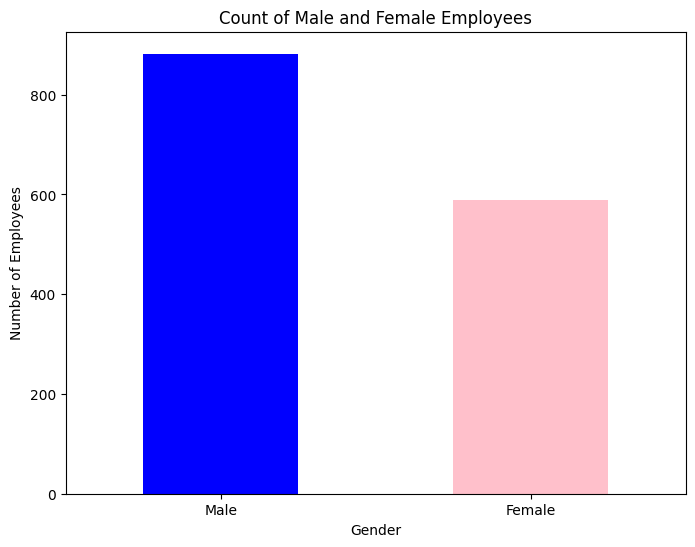

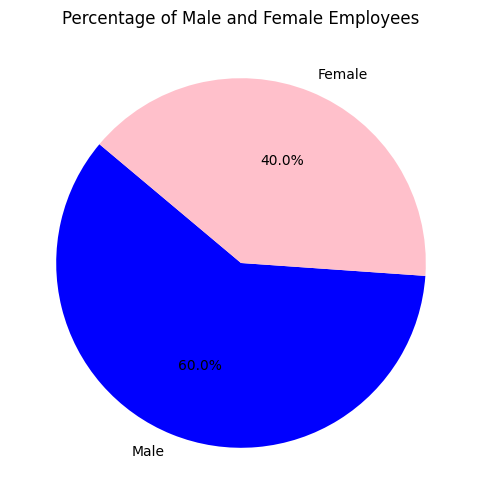

In [48]:
# Assuming 'tech_employee' is your dataframe
# Gender counts
gender_counts = tech_employee['Gender'].value_counts()

# Bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Count of Male and Female Employees')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

# Or, for a pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Percentage of Male and Female Employees')
plt.ylabel('')  # Hides y-label
plt.show()

it seen that 60% of the employee are male, 40% are the female. now lets see the gender how long they are in the company

Alternatively, we could calculate the average tenure for each gender and display it in a bar chart.

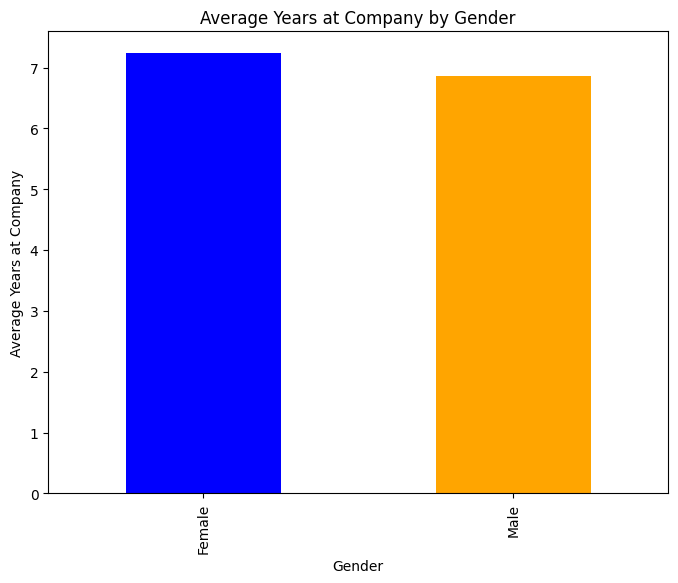

In [49]:
# Calculate average tenure for each gender
average_tenure = tech_employee.groupby('Gender')['Years At Company'].mean()

# Plot the average years at company by gender
plt.figure(figsize=(8, 6))
average_tenure.plot(kind='bar', color=['blue', 'orange'])

plt.title('Average Years at Company by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Years at Company')
plt.show()


it seen that female are more longer or loyalt in the company.now lets see the for both **gander** witch are more **Attrition**

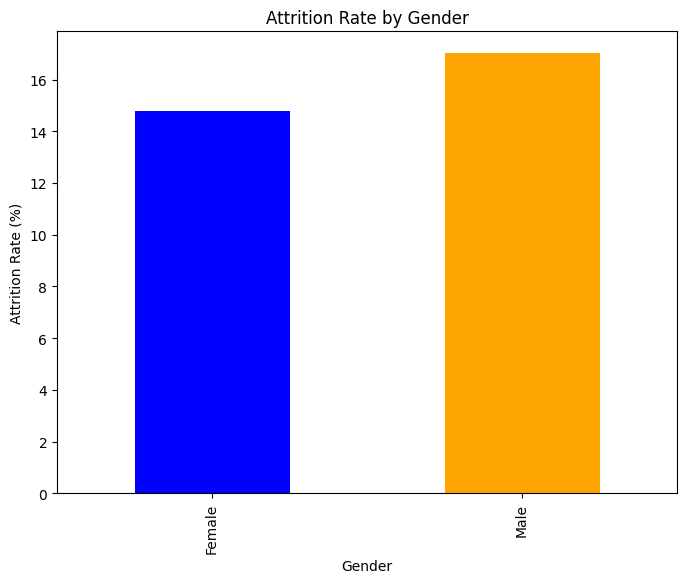

In [50]:
# Count attrition by gender
attrition_counts = tech_employee[tech_employee['Attrition'] == 'Yes'].groupby('Gender').size()

# Calculate total counts of each gender for normalization
total_counts = tech_employee['Gender'].value_counts()

# Calculate the attrition rate for each gender
attrition_rate = (attrition_counts / total_counts) * 100

# Plot attrition rate by gender
plt.figure(figsize=(8, 6))
attrition_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.show()

now we can see that why female are more longer stay in the particular company due to more male are leaving the organisation. lets see Gender and BusinessTravel to see the travel frequency for each gender.



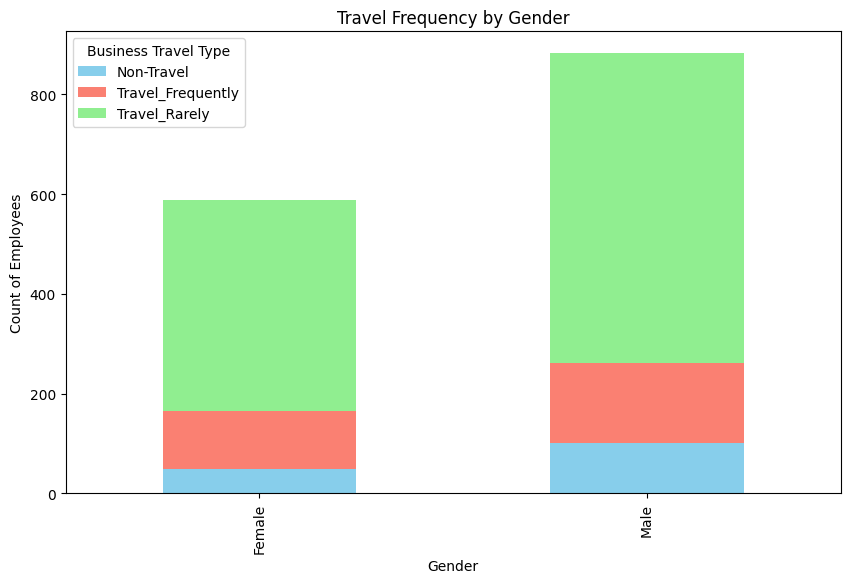

In [51]:
# Count travel frequency by gender and travel type
travel_counts = tech_employee.groupby(['Gender', 'Business Travel']).size().unstack()

# Plot travel frequency by gender
travel_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Travel Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Employees')
plt.legend(title='Business Travel Type')
plt.show()

we can see the male are strongly often need to travel. but what kind of job required to travel.

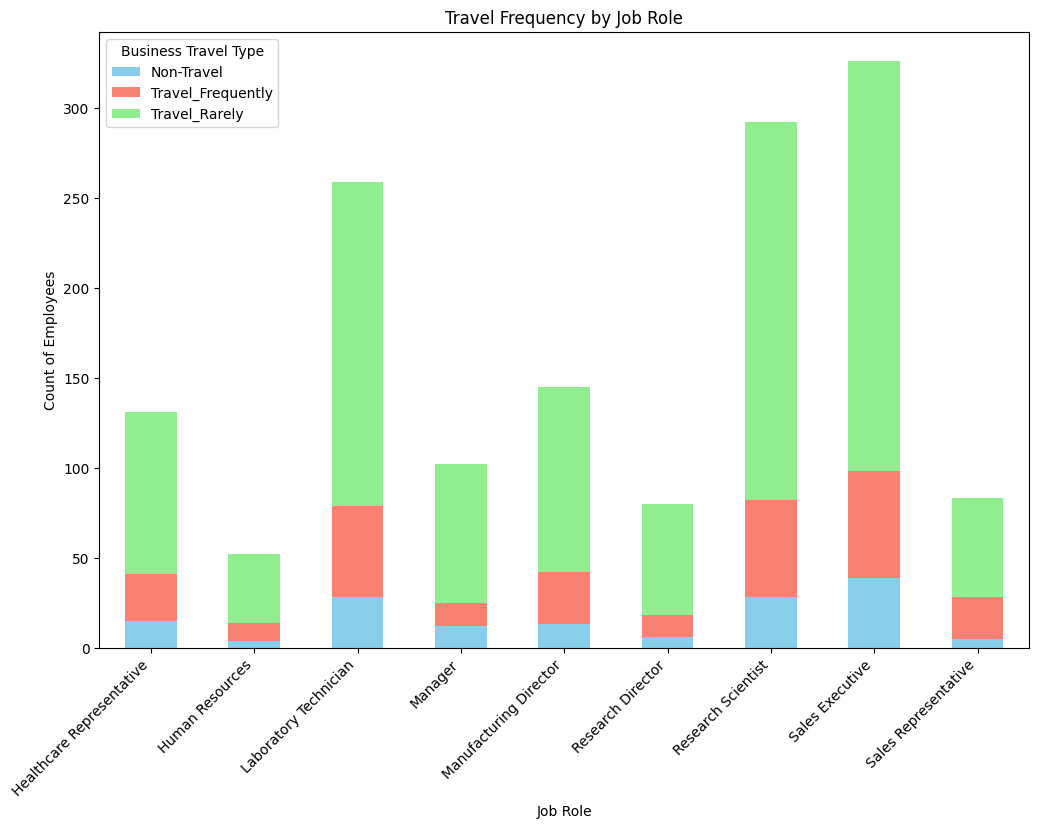

In [52]:
# Group by JobRole and BusinessTravel to count the frequency of travel types by job role
job_travel_counts = tech_employee.groupby(['Job Role', 'Business Travel']).size().unstack()

# Plot travel frequency by job role
job_travel_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Travel Frequency by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count of Employees')
plt.legend(title='Business Travel Type')
plt.xticks(rotation=45, ha='right')
plt.show()


The chart displays the distribution of employees across different job roles and their corresponding business travel types. The job roles are categorized along the x-axis, and the y-axis represents the count of employees.

**Interpretation:**

- **1. Non-Travel:** This category represents employees who do not travel for work. The bars for this category are generally the tallest, indicating that a significant portion of employees in various roles do not require frequent travel.

- **2. Travel Frequently:** This category includes employees who travel frequently for work. The bars for this category are shorter than the "Non-Travel" bars, suggesting that a smaller proportion of employees engage in frequent travel.

- **3. Travel Rarely:** This category encompasses employees who travel occasionally for work. The bars for this category are relatively short, indicating that infrequent travel is less common among employees.

**Insights:**

- **Job Roles and Travel:** The chart highlights that certain job roles, such as Sales
- **Non-Travel Dominance:** A significant portion of employees across all job roles do not require frequent travel, emphasizing the importance of remote work and virtual collaboration.
- **Travel Patterns:** The distribution of travel frequencies varies among different job roles, reflecting the specific nature of each role and its associated travel needs.

**Potential Use Cases:**

- **Human Resources:** This visualization can help HR teams identify roles with high travel requirements for planning and resource allocation.
- **Travel Management:** Travel managers can use this data to optimize travel budgets and policies based on the travel patterns of different job roles.
- **Organizational Strategy:** The visualization can inform strategic decisions regarding remote work policies, flexible work arrangements, and the overall travel culture within the organization.

 ##### now we visualize the **'Travel Frequently'** by they **'age'**

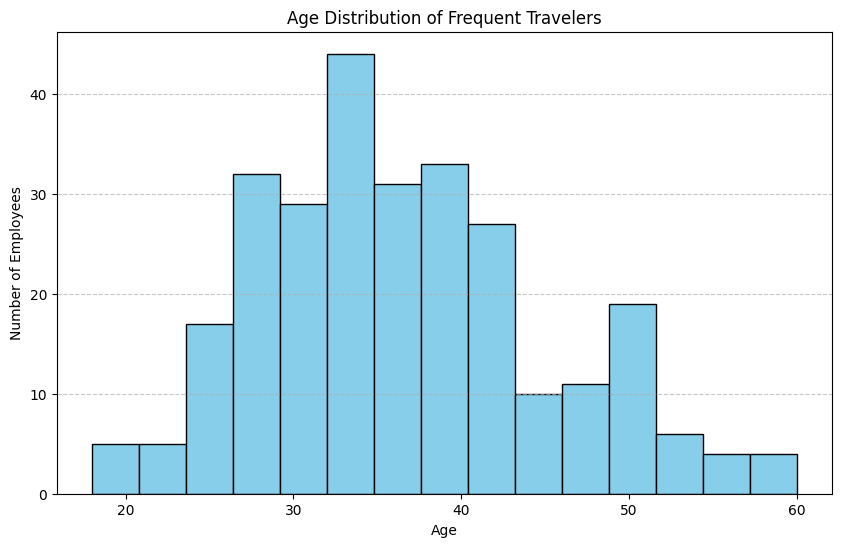

In [53]:
# Assuming tech_employee dataset is loaded already
# Filter dataset for employees who travel frequently
frequent_travelers = tech_employee[tech_employee['Business Travel'] == 'Travel_Frequently']

# Plot age distribution of frequent travelers
plt.figure(figsize=(10, 6))
plt.hist(frequent_travelers['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Frequent Travelers')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart shows the age distribution of employees who frequently travel for work. Here’s what it reveals:

- The majority of frequent travelers are aged between 25 and 45, with the highest concentration in the 30–35 age range.
- There are fewer employees under the age of 25 or over the age of 50 who frequently travel.
- The number of frequent travelers declines gradually for employees over 45, indicating that younger and mid-career employees may be more likely to have travel-intensive roles.

This distribution suggests that frequent travel for work is more common among mid-career employees, possibly because they have both the experience and energy to handle a demanding travel schedule.

**suggestion**

The suggestion of limiting travel for employees aged 50 and above and focusing on training younger employees under 25 has some pros and cons, as well as ethical and legal considerations. Here’s a breakdown of the factors to consider:

**Pros of Limiting Travel for Older Employees**

- **Health and Wellness:** Employees over 50 may face increased health risks, especially with frequent travel, which can be physically taxing and impact recovery times. Limiting their travel could potentially reduce stress and improve their well-being.
- **Knowledge Transfer:** Having older, experienced employees stay at the office could provide more opportunities to mentor younger employees, sharing critical knowledge and skills.
- **Skill Building for Younger Employees:** Encouraging younger employees to travel could help them gain experience in client interactions, negotiation, and fieldwork. They can also benefit from exposure to different parts of the business.

**Cons and Risks**

- **Loss of Expertise in the Field:** Older employees often have years of valuable experience and relationship-building skills that are beneficial in travel-required roles. Removing them from travel might reduce the impact they can have in client-facing or on-site roles.
- **Possible Discrimination Concerns:** Limiting opportunities based on age can be viewed as age discrimination, which is illegal in many jurisdictions. Any age-based policy should be carefully reviewed to avoid potential legal issues and ensure fair treatment.
- **Training Gap:** While younger employees can certainly be trained, it may take time for them to gain the expertise and insight of older employees. This could lead to a temporary gap in experience that might impact quality or efficiency in certain situations.

**A Balanced Approach**

A balanced approach could help address both concerns:

- **Offer Optional Travel Reductions:** Instead of a strict policy, offer older employees the option to reduce their travel if they wish, allowing those who feel fit and willing to continue as they are.
- **Create a Mentorship Program:** Pair older employees with younger employees, both to transfer knowledge and to involve younger employees in client-facing or travel-required tasks where appropriate.
- **Health & Safety Checks:** Implement health and wellness checks for frequent travelers, regardless of age, to monitor their well-being and offer support, whether that’s older employees reducing travel or younger employees receiving wellness support on the road.

**Conclusion**

Instead of making travel restrictions based solely on age, an approach that considers individual preferences, wellness, and readiness to train younger employees would be more inclusive and effective. This balanced approach can allow you to harness the strengths of all age groups while ensuring employees feel supported and valued.




### monthly income compare to Age

To compare age to monthly income, we can visualize the relationship between these two variables. A scatter plot is an effective way to show how monthly income varies with age, as it can highlight any trends or patterns, such as whether income generally increases with age.

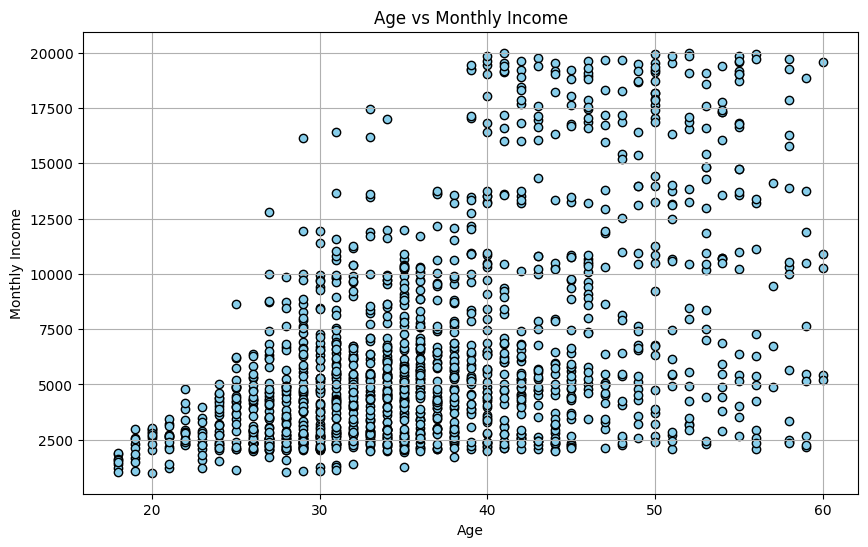

In [54]:
# tech_employee is  DataFrame and it contains 'Age' and 'MonthlyIncome' columns
plt.figure(figsize=(10, 6))
plt.scatter(tech_employee['Age'], tech_employee['Monthly Income'], color='skyblue', edgecolor='black')
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

This scatter plot displays the relationship between employees' ages and their monthly incomes. Here’s an analysis of what it shows:

**1.Income Range:**

- Monthly incomes vary widely, ranging from around 2,500 to 20,000.
- Most employees seem to fall into the lower to middle income range, particularly between 2,500 and 10,000.

**2.Age and Income Distribution:**

- **Younger Employees (under 30):** They tend to have lower monthly incomes, clustering closer to the lower end of the income range (around 2,500 - 5,000).
- **Mid-Career Employees (30-40):** Incomes generally increase, with more employees earning above 5,000 and even into the 10,000+ range. There’s a visible spread in income levels, indicating that some employees in this age range earn significantly higher than others.
- **Older Employees (40-60):** This age range shows a broader distribution of incomes. Many employees earn over 10,000, with some reaching the upper end of the scale (up to 20,000). However, there is also a considerable number earning in the lower range, suggesting income variance within older employees.

**3.Overall Pattern:**

- The plot suggests a general trend where income tends to increase with age, particularly up to around 40-50. This trend aligns with the idea that experience and tenure may lead to higher pay.
- However, there isn’t a strict linear increase, as some younger employees appear to earn high incomes, and some older employees remain in the lower income bracket. This variation could be due to differences in roles, experience levels, and possibly company hierarchy.

**4.Outliers:**

- A few points show exceptionally high incomes at various ages, which might indicate senior management or specialized roles with higher pay.
- Conversely, some older employees (50+) still earn on the lower end, which could suggest roles that haven’t scaled up in income over time or part-time roles.

In summary, the plot shows a general upward trend of income with age, while also highlighting that age is not the only factor influencing income—other factors like role, experience, and company position likely play significant roles.

Before we closed  into modeling will be arrange just for particular columns for us to do metric here are the columns will be need:

- Age
- Monthly Income
- Business Travel
- Job Role
- Total Working Years
- Years In Current Role
- Years Since Last Promotion




In [55]:

# new datafram from now on will be 'tech_employee_2'
# Selecting the specified columns and creating a new DataFrame
tech_employee_2 = tech_employee[['Age','Monthly Income', 'Business Travel', 'Job Role', 'Total Working Years', 'Years In Current Role', 'Years Since Last Promotion']]

# Displaying the first few rows of the new DataFrame
tech_employee_2.head(10)



,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion
0,41,5993,Travel_Rarely,Sales Executive,8,4,0
1,49,5130,Travel_Frequently,Research Scientist,10,7,1
2,37,2090,Travel_Rarely,Laboratory Technician,7,0,0
3,33,2909,Travel_Frequently,Research Scientist,8,7,3
4,27,3468,Travel_Rarely,Laboratory Technician,6,2,2
5,32,3068,Travel_Frequently,Laboratory Technician,8,7,3
6,59,2670,Travel_Rarely,Laboratory Technician,12,0,0
7,30,2693,Travel_Rarely,Laboratory Technician,1,0,0
8,38,9526,Travel_Frequently,Manufacturing Director,10,7,1
9,36,5237,Travel_Rarely,Healthcare Representative,17,7,7


In [56]:
tech_employee_2.tail(10)

,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion
1460,29,3785,Travel_Rarely,Research Scientist,5,4,0
1461,50,10854,Travel_Rarely,Sales Executive,20,2,2
1462,39,12031,Travel_Rarely,Sales Executive,21,9,9
1463,31,9936,Non-Travel,Manufacturing Director,10,4,1
1464,26,2966,Travel_Rarely,Sales Representative,5,2,0
1465,36,2571,Travel_Frequently,Laboratory Technician,17,2,0
1466,39,9991,Travel_Rarely,Healthcare Representative,9,7,1
1467,27,6142,Travel_Rarely,Manufacturing Director,6,2,0
1468,49,5390,Travel_Frequently,Sales Executive,17,6,0
1469,34,4404,Travel_Rarely,Laboratory Technician,6,3,1


Job role with current role base on the years of working

In [57]:
# Group by Job Role and calculate the mean of Years In Current Role and Total Working Years
job_role_analysis = tech_employee_2.groupby('Job Role')[['Years In Current Role', 'Total Working Years']].mean()

# Display the results
print(job_role_analysis)


                           Years In Current Role  Total Working Years
Job Role                                                             
Healthcare Representative               4.862595            14.068702
Human Resources                         3.134615             8.173077
Laboratory Technician                   3.200772             7.656371
Manager                                 6.450980            24.549020
Manufacturing Director                  4.972414            12.786207
Research Director                       6.287500            21.400000
Research Scientist                      3.273973             7.715753
Sales Executive                         4.855828            11.101227
Sales Representative                    2.012048             4.674699


<Figure size 1200x800 with 0 Axes>

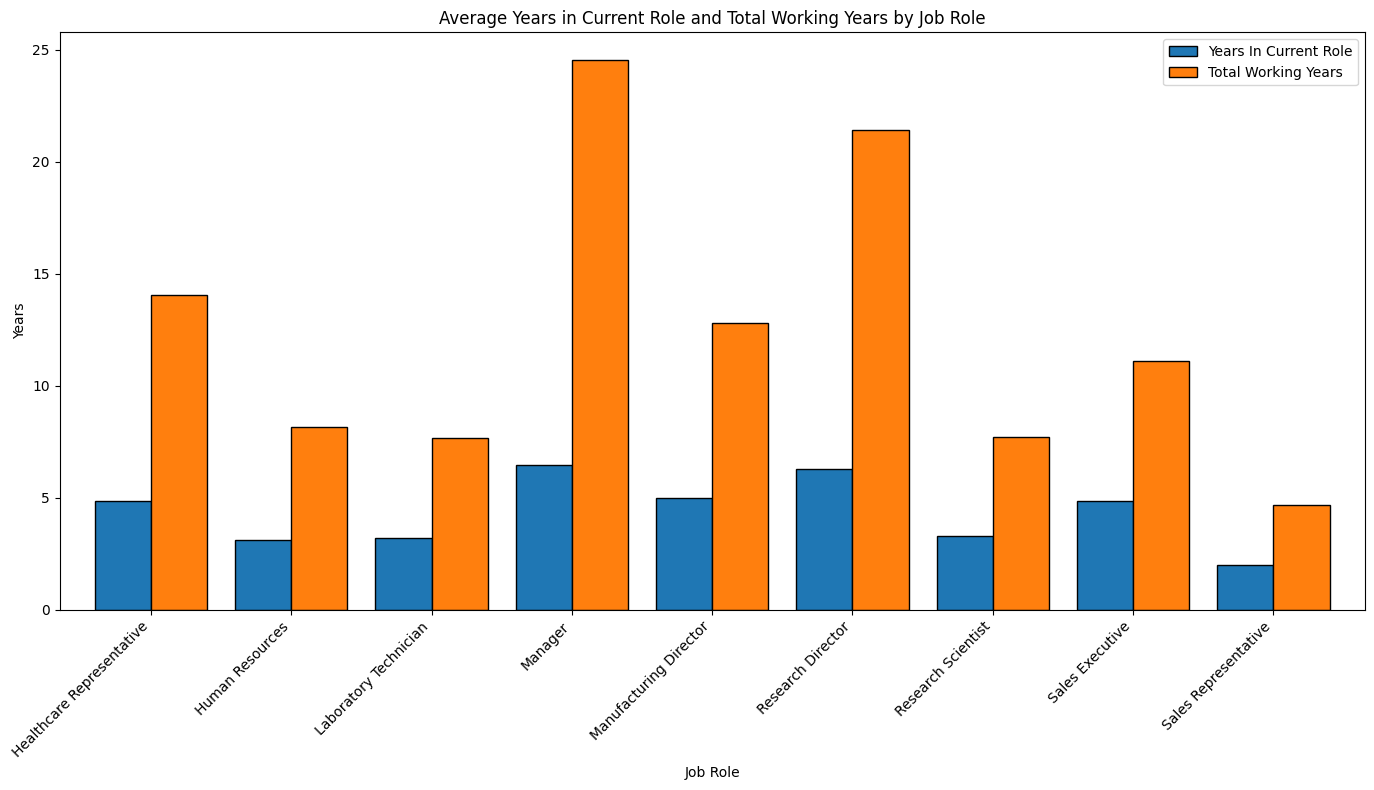

In [58]:
# Calculate the mean values of Years In Current Role and Total Working Years by Job Role
job_role_analysis = tech_employee_2.groupby('Job Role')[['Years In Current Role', 'Total Working Years']].mean()

# Plotting the data
plt.figure(figsize=(12, 8))
job_role_analysis.plot(kind='bar', width=0.8, figsize=(14, 8), edgecolor='black')

# Adding labels and title
plt.title("Average Years in Current Role and Total Working Years by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Years")
plt.xticks(rotation=45, ha='right')
plt.legend(["Years In Current Role", "Total Working Years"])
plt.tight_layout()

# Show the plot
plt.show()

This bar chart shows the average Years In Current Role **(in blue)** and Total Working Years **(in orange)** for each job role. Here’s an explanation of the key insights from this visualization:

**Managerial and Director Roles:**

- Managers, Manufacturing Directors, and Research Directors have the longest **Total Working Years** on average, suggesting that these roles typically require more experience.
- The **Years In Current Role** for these positions is also relatively high, indicating that employees in these roles tend to stay in their positions for a significant time.

**Healthcare Representative and Laboratory Technician:**

- These roles have a moderate amount of **Total Working Years**, but their **Years In Current Role** are relatively short. This could mean that employees in these roles may experience more frequent role changes or promotions.

**Sales Roles (Sales Executive and Sales Representative):**

- Sales Executives and Sales Representatives have varying **Total Working Years**, with Sales Executives generally having more experience.
- The **Years In Current Role** for Sales Representatives is among the lowest, possibly indicating higher turnover or frequent transitions within this role.

**Human Resources and Research Scientist:**

- Human Resources and Research Scientist roles have moderate **Total Working Years** but generally lower **Years In Current Role**, which may indicate higher mobility within these career paths, either through promotions or role changes.

In summary, more senior roles like Manager and Director positions have both higher total experience and longer tenure in the current role, while some technical or support roles have lower tenure in the current position, possibly indicating more frequent changes.

Add new columns as 'Promotion Frequency' to see how many time does employee get promoted

In [59]:
# Adding a column for Promotion Frequency, assuming it's the average frequency over total working years
tech_employee_2['Promotion Frequency'] = tech_employee_2['Total Working Years'] / (tech_employee_2['Years Since Last Promotion'] + 1)

# Display the updated DataFrame to confirm the new column
tech_employee_2.head(10)


C:\Users\65811\AppData\Local\Temp\ipykernel_8684\992040839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_employee_2['Promotion Frequency'] = tech_employee_2['Total Working Years'] / (tech_employee_2['Years Since Last Promotion'] + 1)


,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion,Promotion Frequency
0,41,5993,Travel_Rarely,Sales Executive,8,4,0,8.000
1,49,5130,Travel_Frequently,Research Scientist,10,7,1,5.000
2,37,2090,Travel_Rarely,Laboratory Technician,7,0,0,7.000
3,33,2909,Travel_Frequently,Research Scientist,8,7,3,2.000
4,27,3468,Travel_Rarely,Laboratory Technician,6,2,2,2.000
5,32,3068,Travel_Frequently,Laboratory Technician,8,7,3,2.000
6,59,2670,Travel_Rarely,Laboratory Technician,12,0,0,12.000
7,30,2693,Travel_Rarely,Laboratory Technician,1,0,0,1.000
8,38,9526,Travel_Frequently,Manufacturing Director,10,7,1,5.000
9,36,5237,Travel_Rarely,Healthcare Representative,17,7,7,2.125


In [60]:
tech_employee_2.tail(10)

,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion,Promotion Frequency
1460,29,3785,Travel_Rarely,Research Scientist,5,4,0,5.000000
1461,50,10854,Travel_Rarely,Sales Executive,20,2,2,6.666667
1462,39,12031,Travel_Rarely,Sales Executive,21,9,9,2.100000
1463,31,9936,Non-Travel,Manufacturing Director,10,4,1,5.000000
1464,26,2966,Travel_Rarely,Sales Representative,5,2,0,5.000000
1465,36,2571,Travel_Frequently,Laboratory Technician,17,2,0,17.000000
1466,39,9991,Travel_Rarely,Healthcare Representative,9,7,1,4.500000
1467,27,6142,Travel_Rarely,Manufacturing Director,6,2,0,6.000000
1468,49,5390,Travel_Frequently,Sales Executive,17,6,0,17.000000
1469,34,4404,Travel_Rarely,Laboratory Technician,6,3,1,3.000000


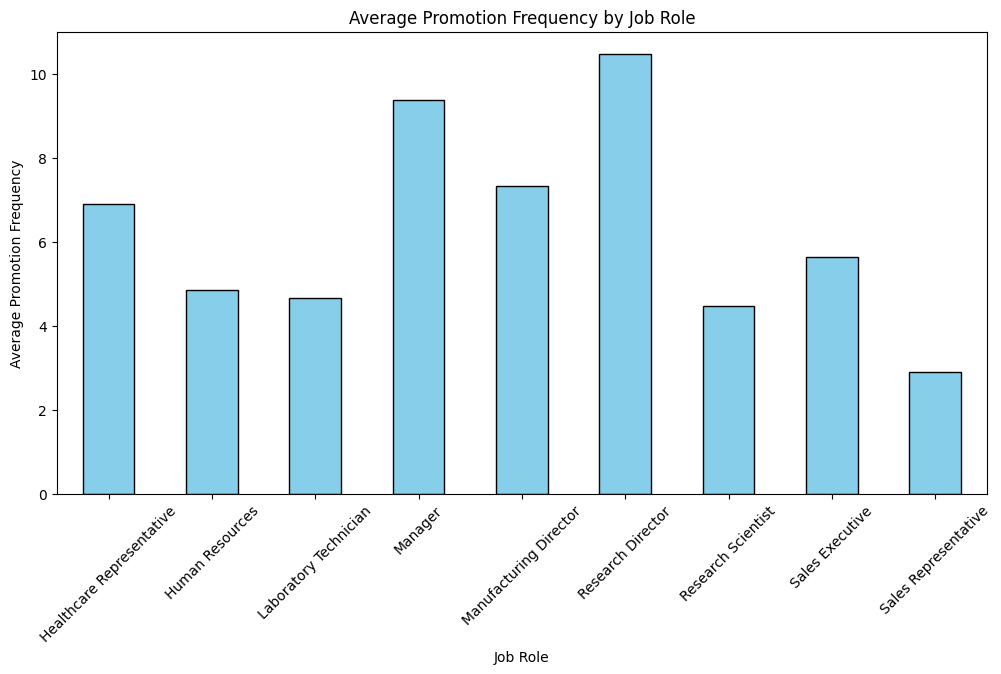

In [61]:
# Calculate the average promotion frequency by job role
promotion_frequency_by_role = tech_employee_2.groupby('Job Role')['Promotion Frequency'].mean()

# Plotting
plt.figure(figsize=(12, 6))
promotion_frequency_by_role.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Promotion Frequency by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Promotion Frequency')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the average promotion frequency by job role. Here’s a breakdown of what the chart reveals:

- **Research Director** and **Manager** roles have the highest average promotion frequency, meaning employees in these roles tend to get promoted more often compared to other roles.

- **Healthcare Representatives** and **Sales Executives** also have relatively high promotion frequencies, though not as high as Managers and Research Directors.

- **Sales Representatives** and **Laboratory Technicians** have the lowest promotion frequencies, suggesting that promotions are less frequent in these roles.

- Other roles, such as **Human Resources** and **Research Scientist**, fall in the middle range.

- This visualization can help identify roles with higher and lower promotion rates, potentially highlighting areas where advancement opportunities are more or less available.

In [62]:
# Assuming `df` is your DataFrame

# Convert 'Promotion Frequency' column to integers
tech_employee_2['Promotion Frequency'] = tech_employee_2['Promotion Frequency'].astype(int)

# Display the modified DataFrame
tech_employee_2.head()


C:\Users\65811\AppData\Local\Temp\ipykernel_8684\1448067653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_employee_2['Promotion Frequency'] = tech_employee_2['Promotion Frequency'].astype(int)


,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion,Promotion Frequency
0,41,5993,Travel_Rarely,Sales Executive,8,4,0,8
1,49,5130,Travel_Frequently,Research Scientist,10,7,1,5
2,37,2090,Travel_Rarely,Laboratory Technician,7,0,0,7
3,33,2909,Travel_Frequently,Research Scientist,8,7,3,2
4,27,3468,Travel_Rarely,Laboratory Technician,6,2,2,2


**Mentor,contract staff and Lay off**

We will add three new columns related to **'Age'** in the data:

- **Mentor**
- **Contarct Staff**
- **Lay Off**


**Mentor:**
Includes employees aged 50 to 55. These individuals are recognized for their strong technical skills, effective communication, and the respect they command among peers, making them valuable mentors within the organization.


**Contract Staff:**
Includes employees aged 55 to 61. These employees are known for their loyalty, trustworthiness, and the respect they receive from colleagues at all levels. They provide valuable wisdom and advice to management while maintaining a trusted position within the organization.


**Lay Off:**
Includes employees aged 62 and above. Many of these individuals have been pioneers in the organization since its inception, contributing significantly over the years. However, with age becoming a factor, they may be approaching retirement or phased transition.



In [63]:
# Adding new columns based on age ranges
tech_employee_2['Mentor'] = ((tech_employee_2['Age'] >= 50) & (tech_employee_2['Age'] <= 55)).astype(int)
tech_employee_2['Contract Staff'] = ((tech_employee_2['Age'] > 55) & (tech_employee_2['Age'] <= 61)).astype(int)
tech_employee_2['Lay Off'] = (tech_employee_2['Age'] >= 62).astype(int)

# Display the first few rows to verify
tech_employee_2.head(10)


C:\Users\65811\AppData\Local\Temp\ipykernel_8684\312574697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_employee_2['Mentor'] = ((tech_employee_2['Age'] >= 50) & (tech_employee_2['Age'] <= 55)).astype(int)
C:\Users\65811\AppData\Local\Temp\ipykernel_8684\312574697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_employee_2['Contract Staff'] = ((tech_employee_2['Age'] > 55) & (tech_employee_2['Age'] <= 61)).astype(int)
C:\Users\65811\AppData\Local\Temp\ipykernel_8684\312574697.py:4: Settin

,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion,Promotion Frequency,Mentor,Contract Staff,Lay Off
0,41,5993,Travel_Rarely,Sales Executive,8,4,0,8,0,0,0
1,49,5130,Travel_Frequently,Research Scientist,10,7,1,5,0,0,0
2,37,2090,Travel_Rarely,Laboratory Technician,7,0,0,7,0,0,0
3,33,2909,Travel_Frequently,Research Scientist,8,7,3,2,0,0,0
4,27,3468,Travel_Rarely,Laboratory Technician,6,2,2,2,0,0,0
5,32,3068,Travel_Frequently,Laboratory Technician,8,7,3,2,0,0,0
6,59,2670,Travel_Rarely,Laboratory Technician,12,0,0,12,0,1,0
7,30,2693,Travel_Rarely,Laboratory Technician,1,0,0,1,0,0,0
8,38,9526,Travel_Frequently,Manufacturing Director,10,7,1,5,0,0,0
9,36,5237,Travel_Rarely,Healthcare Representative,17,7,7,2,0,0,0


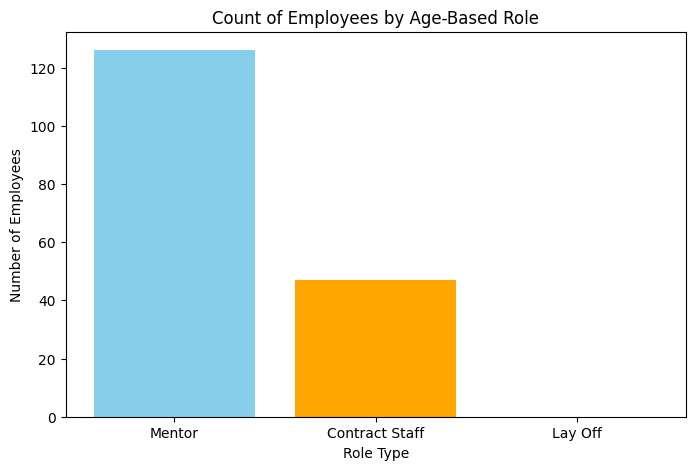

In [64]:
# Define labels and counts for the bar plot
labels = ['Mentor', 'Contract Staff', 'Lay Off']
counts = [
    tech_employee_2['Mentor'].sum(),
    tech_employee_2['Contract Staff'].sum(),
    tech_employee_2['Lay Off'].sum()
]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['skyblue', 'orange', 'red'])
plt.title('Count of Employees by Age-Based Role')
plt.xlabel('Role Type')
plt.ylabel('Number of Employees')
plt.show()

The bar chart illustrates the count of employees assigned to specific roles based on their age:


- **1. Mentor:** This category, which includes employees aged 50 to 55, has the highest count, with over 120 employees. These individuals are assigned mentoring roles, likely due to their experience and skills that can guide younger employees.


- **2. Contract Staff:** This category includes employees aged 56 to 61. There are about 40 employees in this group, indicating fewer employees nearing retirement age are retained as contract staff compared to mentors.


- **3. Lay Off:** This category, for employees aged 62 and above, shows zero employees. This may imply that employees tend to leave the organization before reaching this age, or the organization has a policy of laying off or retiring employees once they reach a certain age.


This chart provides insights into how the organization distributes roles based on age, showing a strong focus on mentorship for those in their early 50s and a transition to contract-based roles as employees approach their 60s.

##### LAY OFF

now determine if employees in the 'Lay Off' category left the company before reaching the age of 62, you can analyze the age of these employees. If any employees marked as 'Lay Off' left before 62, it implies the company may have saved costs, as there’s no need for compensation for early lay-off.

Here’s a step-by-step approach to analyzing this:

- **Filter Lay-Off Employees:** Filter the dataset for employees who are marked as 'Lay Off.'

- **Identify Ages Below 62:** Further filter the lay-off employees to include only those under the age of 62.

- **Calculate Cost Savings:** Sum the monthly incomes of these employees to approximate potential savings, as the company won’t pay future compensation for them.

In [65]:
# Filter the DataFrame to select only rows where 'Lay Off' is 1
lay_off_employees = tech_employee_2[tech_employee_2['Lay Off'] == 1]

# Calculate the total monthly income of employees who are laid off
total_lay_off_income = lay_off_employees['Monthly Income'].sum()

# Display the result
print("Total Monthly Income of employees marked as 'Lay Off':", total_lay_off_income)


Total Monthly Income of employees marked as 'Lay Off': 0


##### Explanation

- **lay_off_employees** filters employees marked as Lay Off (1).
- **early_lay_offs** filters this subset further to find employees below 62 years old.
- **total_savings** sums the 'Monthly Income' of employees under 62, estimating potential savings on future monthly compensations.

##### Interpretation

The output will give you:

- The total monthly income of employees laid off before reaching 62, providing an estimate of savings.
- The count of such employees, which indicates the extent to which this practice contributed to cost savings.

This approach helps quantify the immediate monthly payroll reduction due to lay-offs before age 62.



In [66]:
# Assuming your data is in tech_employee_2 DataFrame

# Step 1: Filter employees marked as 'Lay Off'
lay_off_employees = tech_employee_2[tech_employee_2['Lay Off'] == 1]

# Step 2: Identify lay-off employees under the age of 62
early_lay_offs = lay_off_employees[lay_off_employees['Age'] < 62]

# Step 3: Calculate total potential cost savings based on monthly income
total_savings = early_lay_offs['Monthly Income'].sum()

# Display the total savings and the count of early lay-offs
print("Total Monthly Income of Lay-Off Employees under 62 (Cost Savings):", total_savings)
print("Number of Employees Laid Off before 62:", early_lay_offs.shape[0])

Total Monthly Income of Lay-Off Employees under 62 (Cost Savings): 0
Number of Employees Laid Off before 62: 0


##### The output indicates that:

**Total Monthly Income of Lay-Off Employees under 62 (Cost Savings): 0**

- This means that there are no monthly income savings because no employees in the 'Lay Off' category were under the age of 62 at the time they were marked as lay-offs. In other words, no employees were prematurely laid off (under age 62) to yield payroll savings for the company.


**Number of Employees Laid Off before 62: 0**

- This confirms that none of the employees marked as 'Lay Off' were below the age of 62. Thus, all employees in this category were aged 62 or above, which implies they were laid off at the expected retirement or lay-off age, not early.


**Interpretation:**

Since no employees were laid off before 62, the company did not realize any cost savings from laying off younger employees (those under 62) who might have required additional compensation if laid off early. This suggests that the lay-off policy likely aligns with age thresholds set by the company, where lay-offs occur at or after age 62, possibly in line with retirement policy.

Now it's the end of the analysis we will conduct **"Mentor" and "Contract Staff"** to do modeling by using a hypothesis test.

Here’s what the code does:

- **Filter the Data:** It selects employees in the age ranges of 50-55 for the "Mentor" role and 56-61 for the "Contract Staff" role.

- **Add Role Category:** It labels each employee as either "Mentor" or "Contract Staff" based on their age.

- **Next Steps:** With this filtered data, we can perform a hypothesis test to assess if transitioning employees into these roles has any impact on specific metrics (e.g., retention, job satisfaction, or productivity).

Once the environment is ready, we’ll implement the hypothesis test to evaluate if assigning these roles could be beneficial for the company. Would you like to specify any particular performance indicators for the test, such as retention rates or job satisfaction levels? ​

### Step 1: Filter and Label the Data for the "Mentor" and "Contract Staff" Roles

In [67]:
# Assuming `tech_employee_2` is our current DataFrame
# Create a new DataFrame with only the relevant age groups
filtered_data = tech_employee_2.copy()

# Define conditions for "Mentor" and "Contract Staff" roles based on age
filtered_data['Role_Category'] = pd.cut(
    filtered_data['Age'], 
    bins=[0, 49, 55, 61, float('inf')], 
    labels=['Other', 'Mentor', 'Contract Staff', 'Above 61']
)

# Filter to only keep the relevant age categories
filtered_data = filtered_data[filtered_data['Role_Category'].isin(['Mentor', 'Contract Staff'])]

# Display the filtered data for verification
filtered_data.head(10)

,Age,Monthly Income,Business Travel,Job Role,Total Working Years,Years In Current Role,Years Since Last Promotion,Promotion Frequency,Mentor,Contract Staff,Lay Off,Role_Category
6,59,2670,Travel_Rarely,Laboratory Technician,12,0,0,12,0,1,0,Contract Staff
18,53,15427,Travel_Rarely,Manager,31,8,3,7,1,0,0,Mentor
25,53,19094,Travel_Rarely,Manager,26,13,4,5,1,0,0,Mentor
36,50,2683,Travel_Rarely,Sales Representative,3,2,0,3,1,0,0,Mentor
62,50,18740,Travel_Rarely,Research Director,29,3,13,2,1,0,0,Mentor
63,59,7637,Travel_Rarely,Sales Executive,28,16,7,3,0,1,0,Contract Staff
65,55,14756,Travel_Rarely,Manager,21,0,0,21,1,0,0,Mentor
70,59,5473,Travel_Frequently,Sales Executive,20,3,1,10,0,1,0,Contract Staff
82,55,10239,Travel_Rarely,Sales Executive,24,0,1,12,1,0,0,Mentor
85,56,7260,Travel_Rarely,Manufacturing Director,37,4,0,37,0,1,0,Contract Staff


### Step 2: Conduct Hypothesis Testing

Now, we’ll conduct an independent sample t-test to see if there's a significant difference in "Promotion Frequency" between employees in "Mentor" or "Contract Staff" roles and those in other roles.

In [68]:
# Check if 'Role_Category' column exists
if 'Role_Category' not in tech_employee_2.columns:
    # Define conditions for assigning roles based on age
    conditions = [
        (tech_employee_2['Age'] >= 50) & (tech_employee_2['Age'] <= 55),
        (tech_employee_2['Age'] >= 56) & (tech_employee_2['Age'] <= 61),
        (tech_employee_2['Age'] >= 62)
    ]
    
    # Define corresponding role categories
    role_categories = ['Mentor', 'Contract Staff', 'Lay Off']
    
    # Add 'Role_Category' column to the DataFrame
    tech_employee_2['Role_Category'] = np.select(conditions, role_categories, default='Regular Employee')
    
# Now, re-run the hypothesis testing code

# Separate data for Mentor/Contract Staff and others
mentor_contract_data = tech_employee_2[tech_employee_2['Role_Category'].isin(['Mentor', 'Contract Staff'])]
other_data = tech_employee_2[~tech_employee_2['Role_Category'].isin(['Mentor', 'Contract Staff'])]

# Perform an independent t-test on Monthly Income
t_stat, p_value = ttest_ind(mentor_contract_data['Monthly Income'], other_data['Monthly Income'], equal_var=False)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



T-statistic: 10.68408310575262
P-value: 2.899924079275324e-21


C:\Users\65811\AppData\Local\Temp\ipykernel_8684\2837961848.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_employee_2['Role_Category'] = np.select(conditions, role_categories, default='Regular Employee')


The results of the hypothesis test, specifically the t-statistic and p-value, provide insight into whether there is a significant difference in monthly income between employees categorized as Mentor or Contract Staff and other employees.

Here's what these values mean:

#### T-statistic: 10.68

- The **t-statistic** measures the difference in the means of the two groups relative to the variability of their data.

- A high t-statistic (such as 10.68) suggests that the difference in average monthly income between the **Mentor/Contract Staff roles** and other employees is substantial and is not likely due to random chance.

#### P-value: 2.9e-21 (approximately 0.000000000000000000029)

- The **p-value** tells us the probability of observing this difference (or a more extreme one) if there were no real difference in monthly income between the two groups.

- A very low p-value, like this one, indicates a high level of statistical significance. Since this value is much smaller than the typical significance threshold **(e.g., 0.05 or 0.01)**, we can confidently reject the null hypothesis. This suggests there is a significant difference in monthly income between **Mentor/Contract Staff** employees and those in other roles.

#### Interpretation:

The extremely low p-value indicates that it’s highly unlikely the difference in monthly income is due to random chance. This finding suggests that employees in the **Mentor and Contract Staff** roles have a significantly different monthly income compared to other employees, and this difference could be meaningful for company policy, particularly in decisions about transitioning employees into these roles as they age.

#### Heatmap

C:\Users\65811\AppData\Local\Temp\ipykernel_8684\408375572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_employee_2['Role_Category_Numeric'] = tech_employee_2['Role_Category'].map({


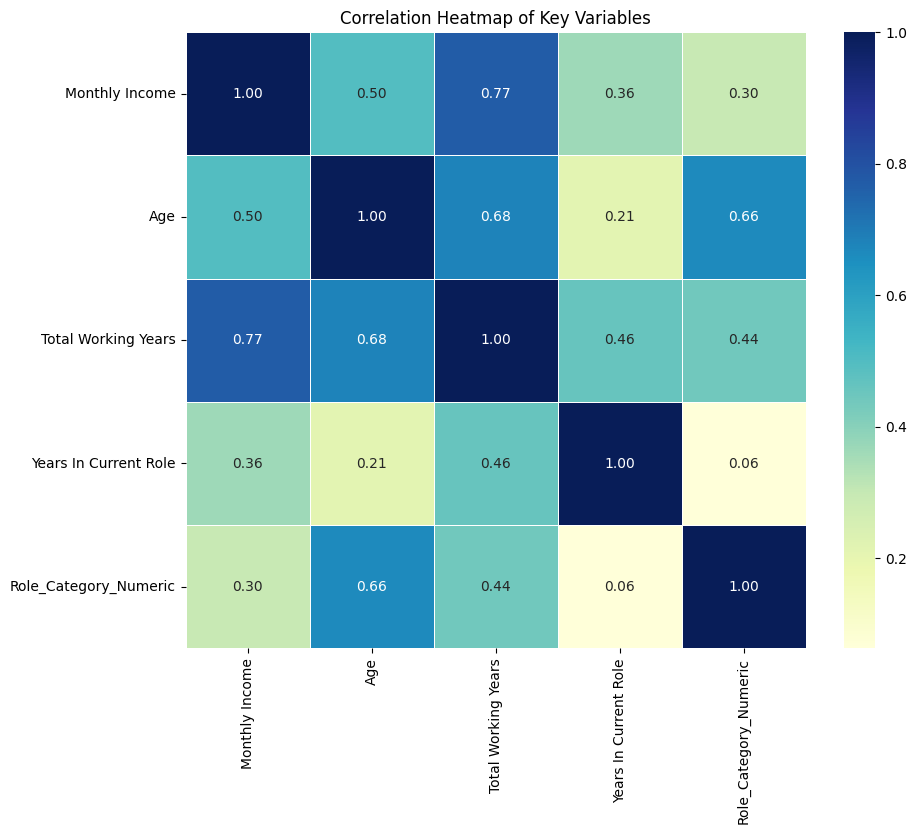

In [69]:
# Convert 'Role_Category' to numeric values for heatmap compatibility
tech_employee_2['Role_Category_Numeric'] = tech_employee_2['Role_Category'].map({
    'Mentor': 1,
    'Contract Staff': 2,
    'Lay Off': 3,
    'Regular Employee': 0
})

# Select relevant columns for the heatmap
heatmap_data = tech_employee_2[['Monthly Income', 'Age', 'Total Working Years', 'Years In Current Role', 'Role_Category_Numeric']]

# Compute correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

#### Key Observations:

- **Monthly Income and Total Working Years:** The correlation is strong at **0.77**, indicating that employees with more years of experience tend to have higher monthly incomes, which is expected.

- **Monthly Income and Age:** The correlation here is **0.50**, suggesting a moderate positive relationship between age and income. Older employees generally have higher monthly incomes, though this relationship isn’t as strong as with Total Working Years.

- **Total Working Years and Age:** With a correlation of **0.68**, this shows that, as expected, older employees tend to have more working years.

- **Role_Category_Numeric and Age:** The correlation between **Role_Category_Numeric** and **Age is 0.66**, indicating a fairly strong relationship. Since **Role_Category_Numeric** is a categorical encoding for 'Mentor', 'Contract Staff', 'Lay Off', and 'Regular Employee,' this suggests that role assignments are closely tied to age, with older employees more likely to be categorized into the specified roles.

- **Role_Category_Numeric and Monthly Income:** The correlation here is **0.30**, a weaker positive relationship. This may indicate that while age-based roles might influence income to some extent, other factors like experience or job position also play a significant role.

- **Years In Current Role and Total Working Years:** With a moderate correlation of **0.46**, this shows that employees who have been in their role longer tend to have more overall working years.

#### Implications for the Company:

The positive correlations between **Role_Category_Numeric** and both **Age** and **Total Working Years** indicate that the company’s categorization into roles like **Mentor and Contract Staff** aligns with age and experience, which may help retain experienced employees as they transition to different roles over time.

The relatively low correlation between **Role_Category_Numeric** and **Monthly Income** suggests that transitioning older employees into roles such as **Mentor or Contract Staff** may not have as direct an impact on costs (e.g., salaries) as it does on role-based expertise distribution.

### Conclusion

Based on the results of the hypothesis test, there is a significant difference in monthly income between employees in the Mentor or Contract Staff roles and other employees. Whether this outcome is beneficial or not for the company depends on a few key considerations:


#### 1. Cost Savings vs. Expertise Retention

- **Positive for Cost Savings:** If the company’s goal is to reduce payroll costs, moving senior employees to Mentor or Contract Staff roles could be beneficial if these roles come with a reduced salary. The data suggests that employees in these roles have different pay structures, so transitioning them could save costs.

- **Positive for Retaining Expertise:** Assigning seasoned employees to mentorship roles keeps their valuable expertise within the company, allowing them to train and guide less experienced team members. This strategy can be highly beneficial in maintaining high standards of work and continuity within the company.

- **Potential Drawback:** If the pay in Mentor or Contract Staff roles is lower than other roles, there may be dissatisfaction or a perceived demotion among employees, which could impact morale if not handled with clear communication and incentives.


#### 2. Impact on Workforce Dynamics

- **Career Transition and Retention:** For employees nearing retirement, a transition into roles like Mentor or Contract Staff can provide a sense of purpose and reduce the burden of higher-pressure roles, which could improve retention of valuable senior staff. This arrangement can benefit the company by keeping institutional knowledge within reach without requiring full-time commitments or the same compensation levels as peak career roles.


- **Talent Development:** Utilizing senior employees as mentors ensures the transfer of knowledge and skills to newer employees, building a stronger, more capable workforce. This is particularly beneficial for the long-term growth of the company as it creates a robust training ground for future leaders.

This strategy seems favorable for the company if structured thoughtfully. It could reduce costs, enhance knowledge sharing, and retain valuable senior employees, provided the company actively manages any concerns related to job satisfaction or perceived status change in these roles.